In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
data = pd.read_csv("./housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


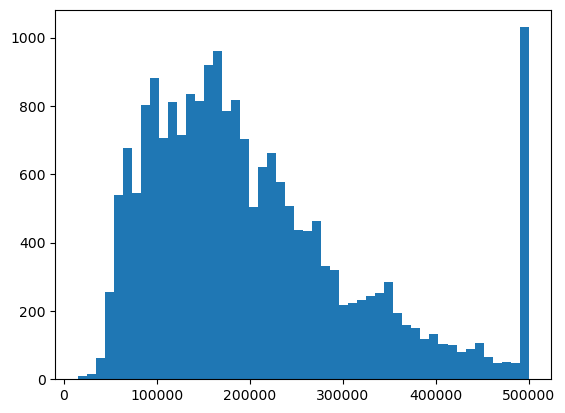

In [33]:
plt.hist(data.median_house_value, bins=50)
plt.show()

In [34]:
tmpdata = data[data.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])]
data = tmpdata.drop('ocean_proximity', axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [35]:
# Question 1
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [36]:
# Question 2
data.population.median()

1195.0

In [38]:
data.reset_index(drop=True, inplace=True)

In [40]:
np.random.seed(42)
n = len(data)

n_val = int(0.2 * n)
n_train = n - (2 * n_val)

idx = np.arange(n)
np.random.shuffle(idx)

data_shuffled = data.iloc[idx]

data_train = data_shuffled.iloc[:n_train].copy()
data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
data_test = data_shuffled.iloc[n_train+n_val:].copy()

y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']

In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [45]:
# Question 3
X0 = data_train.fillna(0).values
Xmean = data_train.fillna(data_train.total_bedrooms.mean()).values

X0_val = data_val.fillna(0).values
Xmean_val = data_val.fillna(data_train.total_bedrooms.mean()).values

w_0, w = train_linear_regression(X0, y_train)
y_pred = w_0 + X0_val.dot(w)
print('With zero', round(rmse(y_val, y_pred), 2))
w_0, w = train_linear_regression(Xmean, y_train)
y_pred = w_0 + Xmean_val.dot(w)
print('With mean', round(rmse(y_val, y_pred), 2))

With zero 0.34
With mean 0.34


In [47]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [48]:
# Question 4
X = data_train.fillna(0).values
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  w_0, w = train_linear_regression_reg(X0, y_train, r=r)
  y_pred = w_0 + X0_val.dot(w)
  print(r, ' -> ', round(rmse(y_val, y_pred), 2))

0  ->  0.34
1e-06  ->  0.34
0.0001  ->  0.34
0.001  ->  0.34
0.01  ->  0.34
0.1  ->  0.34
1  ->  0.34
5  ->  0.35
10  ->  0.35


In [49]:
# Question 5
scores = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  np.random.seed(s)
  n = len(data)

  n_val = int(0.2 * n)
  n_train = n - (2 * n_val)

  idx = np.arange(n)
  np.random.shuffle(idx)

  data_shuffled = data.iloc[idx]

  data_train = data_shuffled.iloc[:n_train].copy()
  data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
  data_test = data_shuffled.iloc[n_train+n_val:].copy()

  y_train = np.log1p(data_train.median_house_value.values)
  y_val = np.log1p(data_val.median_house_value.values)
  y_test = np.log1p(data_test.median_house_value.values)

  del data_train['median_house_value']
  del data_val['median_house_value']
  del data_test['median_house_value']

  X0 = data_train.fillna(0).values
  X0_val = data_val.fillna(0).values
  w_0, w = train_linear_regression(X0, y_train)
  y_pred = w_0 + X0_val.dot(w)
  scores.append(round(rmse(y_val, y_pred), 3))

print(round(np.std(scores), 3))

0.005


In [51]:
# Question 6
np.random.seed(9)
n = len(data)

n_test = int(0.2 * n)
n_train = n - n_test

idx = np.arange(n)
np.random.shuffle(idx)

data_shuffled = data.iloc[idx]

data_train = data_shuffled.iloc[:n_train].copy()
data_test = data_shuffled.iloc[n_train:].copy()

y_train = np.log1p(data_train.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

del data_train['median_house_value']
del data_test['median_house_value']

X0 = data_train.fillna(0).values
X0_test = data_test.fillna(0).values
w_0, w = train_linear_regression_reg(X0, y_train, r=0.001)
y_pred = w_0 + X0_test.dot(w)
print(rmse(y_test, y_pred))

0.3349899336611395
